<a href="https://colab.research.google.com/github/Navneet2409/cardiovascular-risk-prediction/blob/main/Cardiovascular_Notebook_Navneet_Keshri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Cardiovascular Risk Prediction**



##### **Project Type**    - Classification Algorithm
##### **Contribution**    - Individual


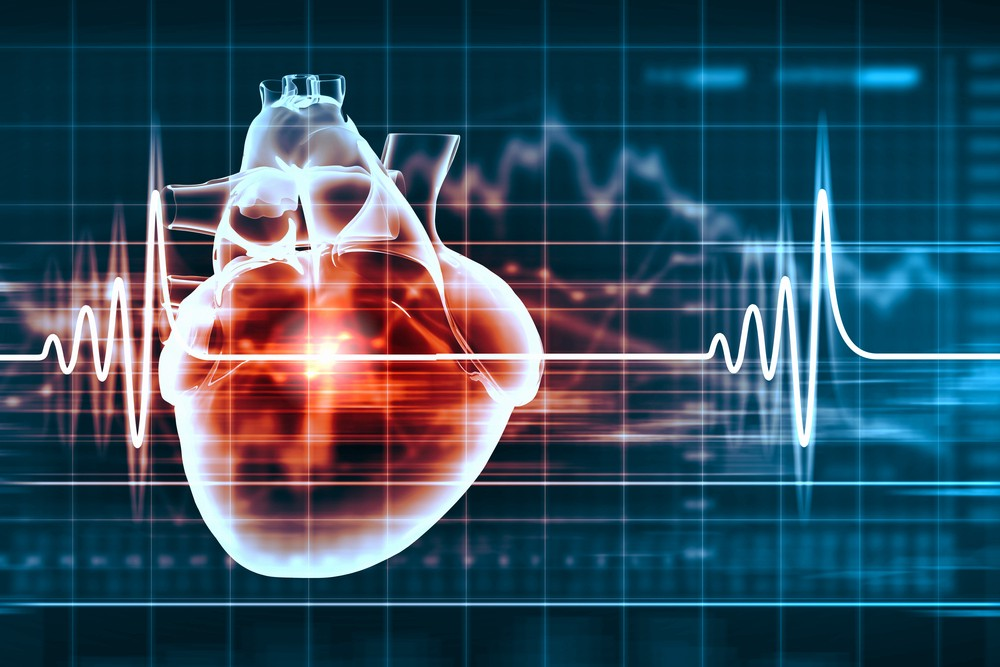

# **GitHub Link -**

https://github.com/Navneet2409/cardiovascular-risk-prediction

# **Project Summary -**

The project aims to predict the 10-year risk of future coronary heart disease (CHD) for patients in Flamingham, Massachusetts. A dataset containing demographic, behavioral, and medical risk factors for over 4000 patients is used to build a predictive model. The model will use machine learning techniques to analyze the provided information and make accurate CHD risk predictions. The goal of the project is to develop a tool for early detection and prevention of CHD, addressing a significant public health concern. The outcome of the project will be a predictive model that can be used by healthcare providers to make informed decisions regarding patient care.

# **Index**

###**In this project, We will do**
1.   Problem Statement
2.   Know Your Data
3.   Understanding Your Variables
4.   EDA
5.   Data Cleaning
6.   Hypothesis Testing (if required)
7.   Feature Engineering
8.   ML Model Implementation
9.   Conclusion

# **Let's Begin !**

## **1. Problem Statement**

**What exactly are cardiovascular diseases?**

A group of conditions affecting the heart and blood vessels is known as cardiovascular diseases. They consist of heart disease, which affects the blood vessels that supply the heart muscle. The majority of the time, a blockage that prevents blood from flowing to the heart or brain is to blame for heart attacks and strokes, which are typically sudden events. A buildup of fatty deposits on the inner walls of the blood vessels that supply the heart or brain is the most common cause of this.


The goal of the classification is to predict the 10-year risk of future coronary heart disease (CHD) for patients. The issue of coronary heart disease is a significant public health concern and early prediction of CHD risk is crucial for preventative measures. The dataset is from an ongoing cardiovascular study on residents of Flamingham, Massachusetts. The data set includes over 4000 records and 15 attributes, each of which is a potential risk factor, including demographic, behavioral, and medical risk factors.

## **2. Know Your Data**

### Import Libraries

In [79]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Impoting data preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing model selection libraries.
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Importing metrics for model evaluation.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, plot_confusion_matrix, ConfusionMatrixDisplay

# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing SMOTE for handling class imbalance.
from imblearn.over_sampling import SMOTE

# Importing warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [127]:
# load the CARDIOVASCULAR RISK DATA from the drive
risk_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Docs/Cardiovascular Risk Prediction - Navneet Keshri/data_cardiovascular_risk.csv', index_col='id')

### Dataset First View

In [81]:
# Viewing the top 5 rows to take a glimpse of the data
risk_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [82]:
# Viewing the last 5 rows
risk_df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns Count

In [83]:
# Dataset Rows & Columns 
risk_df.shape

(3390, 16)

In [84]:
print(f'number of rows : {risk_df.shape[0]}  \nnumber of columns : {risk_df.shape[1]}')

number of rows : 3390  
number of columns : 16


### Dataset Information

In [85]:
# Dataset Info
risk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


### Unique values

In [86]:
# print the unique values in each column
risk_df.nunique()

age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

### Duplicate Values

**How important is it to get rid of duplicate records in my data?**

The mere presence of repeated data in the dataset is referred to as "duplication." This could be caused by incorrect data entry or procedures for collecting data. We can save time and money by not sending the same data to the machine learning model multiple times by removing duplicate data from our set.

In [87]:
# Checking Duplicate Values
value = len(risk_df[risk_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


We found that there were no duplicate entries in the above data.

### Missing Values/Null Values

**Why dealing with missing values is necessary?**

There are frequently a lot of missing values in the actual data. Corrupted or missing data may result in missing values. Since many machine-learning algorithms do not support missing values, missing data must be handled during the dataset's pre-processing. Therefore, we begin by looking for values that are missing.

In [88]:
# Missing Values/Null Values Count
print(risk_df.isnull().sum())

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


We can see there are null values present in totChol, BMI, glucose, BPMeds, cigsPerDay, education has some null values and heartRate has 1 null value.

In [89]:
# Missing Values Percentage
round(risk_df.isna().sum()/len(risk_df)*100, 2)

age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
BMI                0.41
heartRate          0.03
glucose            8.97
TenYearCHD         0.00
dtype: float64

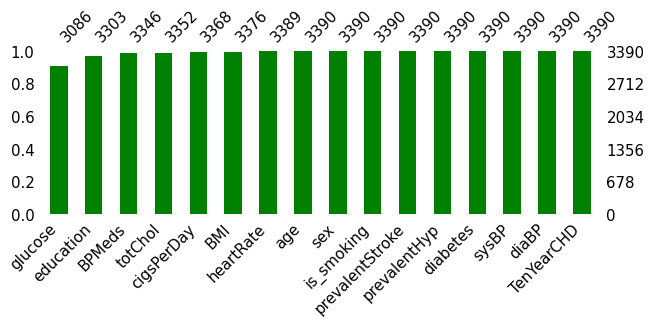

In [90]:
# Visualizing the missing values
import missingno as msno
msno.bar(risk_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

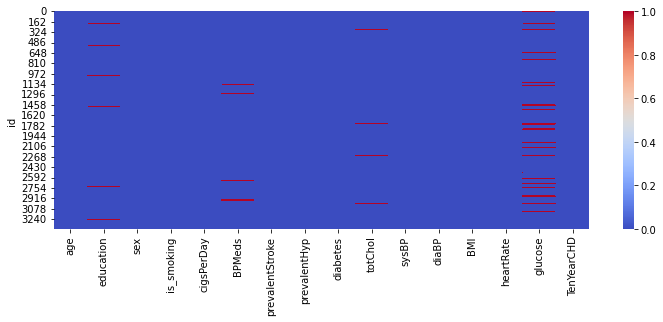

In [91]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(risk_df.isna(), cmap = 'coolwarm')

### What did you know about your dataset?

The data comes from an ongoing cardiovascular study of Framingham, Massachusetts, residents. The purpose of the classification is to determine whether the patient is at risk for coronary heart disease (CHD) in the ten years to come. The data about the patients is provided by the dataset. It incorporates more than 4,000 records and 15 ascribes.

A classification algorithm is a method of supervised learning that divides data into various classes by utilizing data training. Data or observations are used to train classification predictive modeling, and new observations are categorized into classes or groups.

* There are 3390 rows and 16 columns in the dataset. In the 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose', there are missing values. The dataset does not contain any duplicate values.

* A potential risk factor exists for each attribute. Demographic, behavioral, and medical risk factors are these characteristics.

* First, we should try to understand the dataset through EDA, and then we can deal with null values later.

## **3. Understanding Your Variables**

###  Columns

In [92]:
# Dataset Columns
risk_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

###  Statistical Summary

In [93]:
# Dataset Describe    (used to get statistics of numerical columns)
risk_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.00,90.00,142.5


As can be seen in the statistical summary, there is skewness and outliers present in the continuous features 'cigsperday', 'totchol', 'sysbp', 'diebp', 'BMI', 'heartrate', and 'glucose' because there is such a large difference between the 75% percentile value and the maximum value.

###  Variables Description

Demographic
* **age  :** Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* **education :** level of education from 1 to 4 (Ordinal Variable)
* **sex :** male or female ("M" or "F")

Behavioral

* **is_smoking :** whether or not the patient is a current smoker ("YES" or "NO")
* **cigsPerDay :** the number of cigarettes that the person smoked on average in one day (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

* **BPMeds :** whether or not the patient was on blood pressure medication (Nominal)
* **prevalentStroke :** whether or not the patient had previously had a stroke (Nominal)
* **prevalentHyp :** whether or not the patient was hypertensive (Nominal)
* **diabetes :** whether or not the patient had diabetes (Nominal)

Medical(current)

* **totChol :** total cholesterol level (Continuous)
* **sysBP :** systolic blood pressure (Continuous)
* **diaBP :** diastolic blood pressure (Continuous)
* **BMI :** Body Mass Index (Continuous)
* **heartRate :** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **glucose :** glucose level (Continuous)

Predict variable (desired target)
* **TenYearCHD :** (binary: “1”, means “Yes”, “0” means “No”)

### Unique Values

In [94]:
# Check Unique Values for each variable.
for i in risk_df.columns.tolist():
  print("No. of unique values in",i,"is",risk_df[i].nunique())

No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


## **4. EDA**

#### **What is EDA?**
* EDA stands for Exploratory Data Analysis. It is a process of analyzing and understanding the data, which is an essential step in the data science process. The goal of EDA is to gain insights into the data, identify patterns, and discover relationships and trends. It is an iterative process that helps to identify outliers, missing values, and any other issues that may affect the analysis and modeling of the data.


#### **4.1 Numeric and Category features**

In [95]:
numeric_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 10 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in risk_df.columns:  
  if risk_df[col].nunique() > 10:
    numeric_features.append(col) 
  else:
    categorical_features.append(col) 

print(f'numeric feature : {numeric_features}')
print(f'category feature : {categorical_features}')

numeric feature : ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
category feature : ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


**Observation:**

* In our case, most of the categorical features are of the binary type, so the values are 0 and 1 (with a few exceptions). In terms of the numerical features, each one has a unique set of continuous and range values.

#### **Univariate Analysis**

##### **Data Distribution of Numerical features**

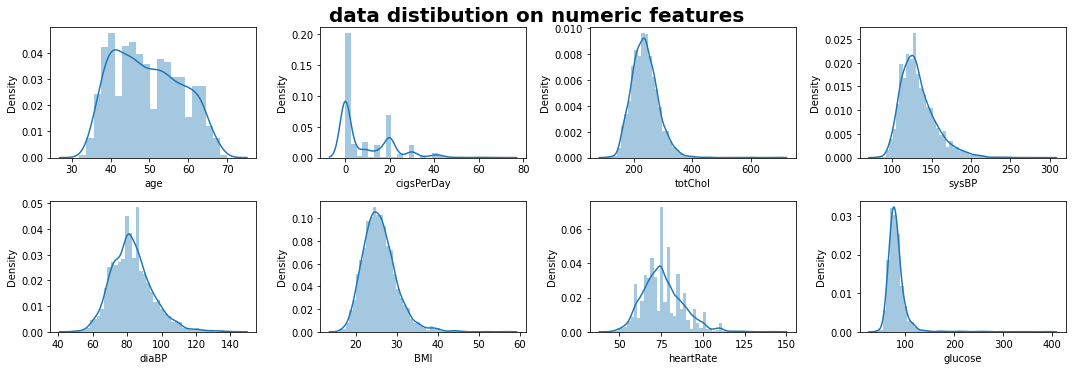

In [96]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('data distibution on numeric features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)                       # subplots 2 rows, 4 columns

  # dist plots
  sns.distplot(risk_df[col])  
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()    

**Observation:**

* For numerical features, we can see that the majority of distributions are right-skewed. The distributions of totChol (total cholesterol) and BMI are roughly comparable. The distribution of glucose is highly skewed to the right. It demonstrates that glucose has many outliers.

##### **Outlier Analysis of Numerical features**

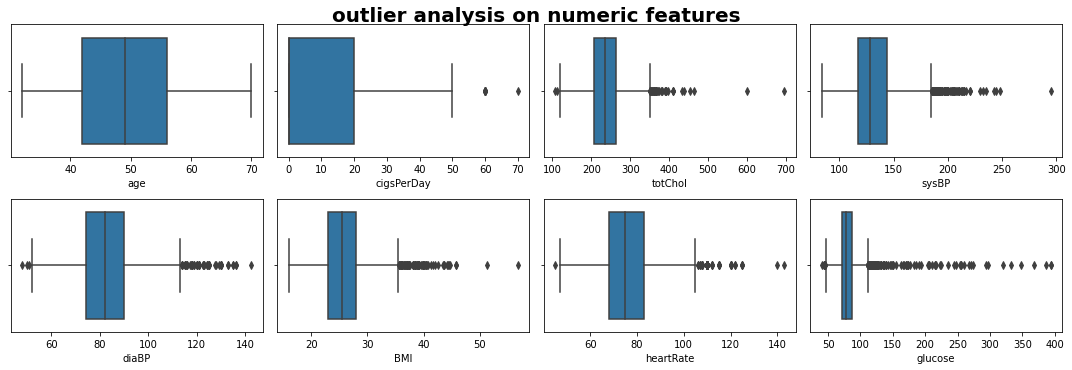

In [97]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('outlier analysis on numeric features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)                       # subplots 2 rows, 4 columns
  
  # boxplots
  sns.boxplot(risk_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

**Obesrvation:** 
* Outliers are visible in the 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', and 'glucose' columns.

##### **Univariate Analysis of Categoric Features**

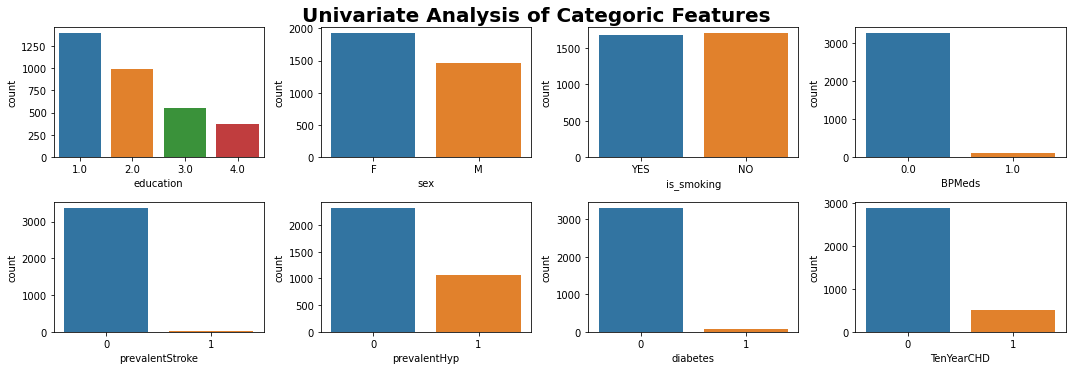

In [98]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Univariate Analysis of Categoric Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(categorical_features):
  plt.subplot(2, 4, i+1)            # subplot of 2 rows and 4 columns

  # countplot
  sns.countplot(risk_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

**Observations:** 
* In the 'education' column majority of the count falls under category 1, with fewer falling under category 4.
* When compared to male patients, female patients are greater in numbers.
* The proportion of non-smokers and smokers is nearly identical.
* Majority of patients do not take blood pressure medication.
* Fewer patients had suffered a stroke previously.
* Lower proportion of patients had hypertension in the past.
* Diabetes was present in fewer patients.
* Lower number of patients had a risk of coronary heart disease (CHD) over 10 years. (target variable - Imbalance data)

#### **Bivariate Analysis**

##### **Scatter plot between target varible wrt to age and heartRate**

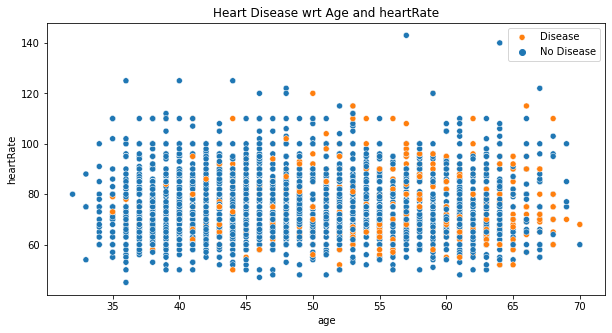

In [99]:
# plotting graph to analyze age with respect to heartrate which are having Disease or No Disease

# figsize
plt.figure(figsize=(10,5))
# scatterplot
sns.scatterplot(x='age', y='heartRate', hue='TenYearCHD', data=risk_df)
# title
plt.title('Heart Disease wrt Age and heartRate')
plt.legend(['Disease', 'No Disease'])

**Observation:** 
* There is a clear relation between age and Heart Disease, with the increase in age the chance of heart disease increases. There is no significant relationship between heart disease and heart rate

##### **Regression plot between target varible and numerical features**

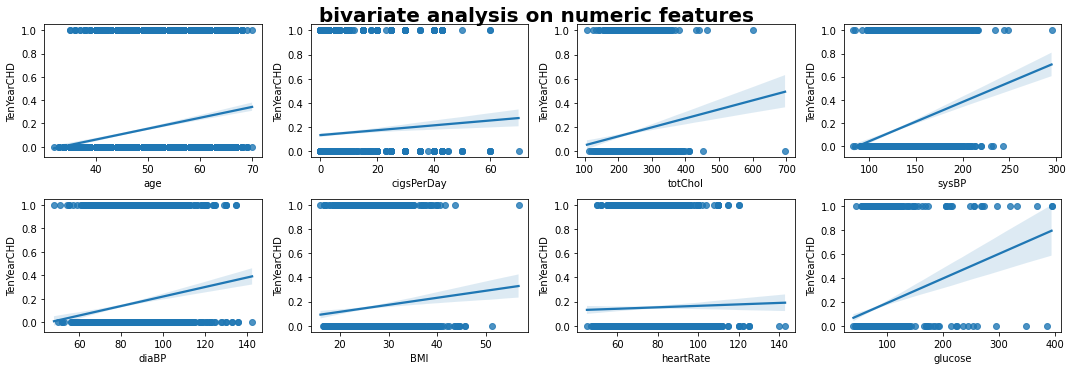

In [100]:
# Checking Linearity of all numerical features with our target variable

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('bivariate analysis on numeric features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)                     # subplots of 2 rows and 4 columns

  # regression plots
  sns.regplot(x=risk_df[col], y='TenYearCHD', data=risk_df)
  # x-axis lable
  plt.xlabel(col)
  plt.tight_layout()

**Observation:** 
* Numerous Independent numerical variables are linked to our Target variable an have a positive relationship with our target variable.

##### **Bivariate Analysis of Categorical Features**

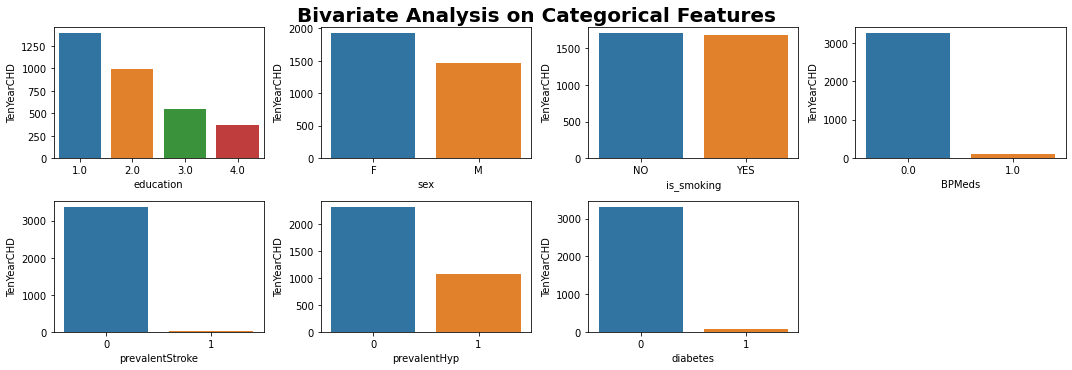

In [101]:
# Counting number of category present in each feature with respect to target feature  

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Bivariate Analysis on Categorical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(categorical_features[:-1]):       # taking all features in categoric column except target feature(TenYearCHD) 
  plt.subplot(2, 4, i+1)                                 # subplots of 2 rows and 4 columns
  a = risk_df.groupby(col)[['TenYearCHD']].count().reset_index()

  # barplot
  sns.barplot(x=a[col], y=a['TenYearCHD'])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

## **5. Data Cleaning**

#### **What is data cleaning?**
* Data cleaning is the process of identifying and correcting or removing inaccuracies, inconsistencies, and missing values in a dataset. It is an important step in the data preparation process that ensures that the data is accurate, complete, and in a format that can be easily analyzed. Data cleaning may include tasks such as removing duplicate records, filling in missing values, correcting errors, and standardizing data formats. The goal of data cleaning is to improve the quality of the data and make it suitable for further analysis and modeling.

### **Duplicate Values**

In [128]:
# counting duplicate values
risk_df.duplicated().sum()

0

There is no duplicate record in the dataset

### **Missing Values**

In [129]:
# Missing Values/Null Values Count
print(risk_df.isnull().sum())

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


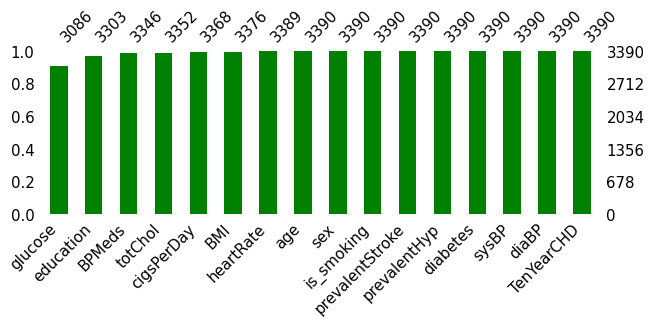

In [130]:
# Visualizing the missing values
import missingno as msno
msno.bar(risk_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

In [131]:
# Missing Values Percentage
round(risk_df.isna().sum()/len(risk_df)*100, 2)

age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
BMI                0.41
heartRate          0.03
glucose            8.97
TenYearCHD         0.00
dtype: float64

In [132]:
# checking the shape of the data before missing value treatment
risk_df.shape

(3390, 16)

**Handling Missing Values**
* Typically, we use other records to replace these null values. However, the entries in this dataset are person-specific. The values vary from person to person, and the dataset is related to the medical field in this particular instance. Consequently, removing rows with any null value is the most logical choice we have for dealing with such values.

* We cannot take any risks with this prediction, so if we attempt to impute null values using advanced methods, it may affect the outcome because the values will be incorrect.

* **In the healthcare industry, every piece of data is crucial. Because of this, we came up with a solution by setting a threshold value. If a feature has less than 5% null values, we decide to drop those rows, and the remaining rows are imputing, which will affect prediction but not significantly.**

In [133]:
# features which has less than 5%  null values present. 
nan_columns = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

# dropping null values
risk_df.dropna(subset=nan_columns, inplace=True)

In [134]:
# glucose level are continuous in nature. 
# Outlier are not treating yet thats why imputimg NaN values with median value.

risk_df['glucose'] = risk_df.glucose.fillna(risk_df.glucose.median())

In [135]:
# checking for null values after treating them.
risk_df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [136]:
# checking the shape of the data after missing values treatment
risk_df.shape

(3189, 16)

### **Skewness**

In [113]:
# statistical summary
risk_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3189.0,49.423957,8.556235,32.00,42.00,49.00,56.00,70.000
education,3189.0,1.972719,1.018435,1.00,1.00,2.00,3.00,4.000
cigsPerDay,3189.0,9.069928,11.752191,0.00,0.00,0.00,20.00,50.000
BPMeds,3189.0,0.029476,0.169164,0.00,0.00,0.00,0.00,1.000
prevalentStroke,3189.0,0.005958,0.076970,0.00,0.00,0.00,0.00,1.000
prevalentHyp,3189.0,0.313264,0.463894,0.00,0.00,0.00,1.00,1.000
diabetes,3189.0,0.025400,0.157361,0.00,0.00,0.00,0.00,1.000
totChol,3189.0,236.565695,43.033082,119.00,206.00,234.00,264.00,351.000
sysBP,3189.0,131.923330,20.556218,83.50,117.00,128.00,143.50,183.250
diaBP,3189.0,82.670273,11.445373,52.00,74.50,82.00,89.50,112.000


As can be seen in the statistical summary for numerical features, there is a significant difference between the 75% percentile and maximum value, indicating that the dataset contains skewness and outliers.

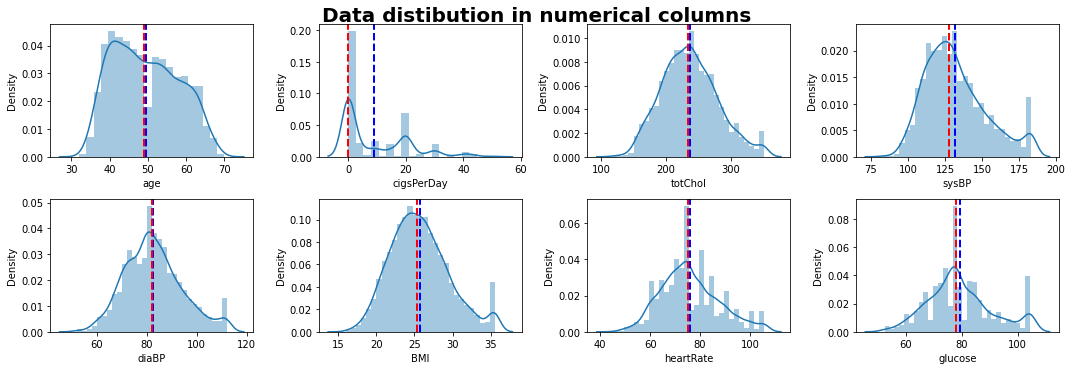

In [114]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Data distibution in numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)                      # subplots of 2 rows and 4 columns

  # distplot
  sns.distplot(risk_df[col]) 
  # mean line
  plt.axvline(risk_df[col].mean(), color='blue', linestyle='dashed', linewidth=2)
  # median line
  plt.axvline(risk_df[col].median(), color='red', linestyle='dashed', linewidth=2)   
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

**Observation:** 
* For numerical features, we can see that the majority of distributions are right-skewed. The distributions of totChol (total cholesterol) and BMI are roughly comparable. The distribution of glucose is highly skewed to the right. It demonstrates that glucose has many outliers.

* Some of the variables can get a normal distribution when outliers are removed. As a result, it appears that outliers should be removed before the transformation. First, we get rid of outliers, and then we check to see if we need to use the transformation technique again.

### **Treating Outliers**

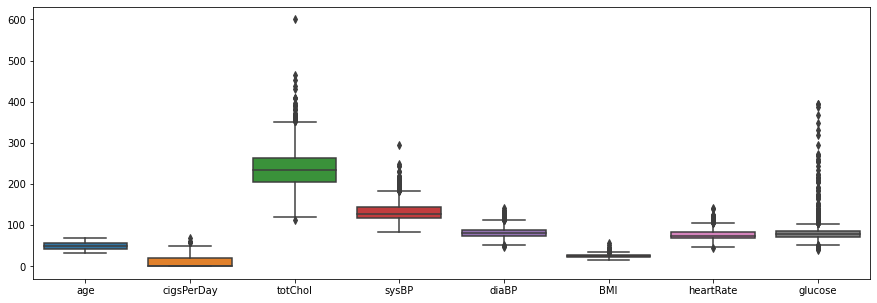

In [137]:
# figsize
plt.figure(figsize=(15,5))
# boxplot of numerical features
sns.boxplot(data=risk_df[numeric_features])
plt.show()    

* Since we have limited datapoint hence we are not simply removing the outlier instead of that we are using the clipping method.

**Clipping Method:** In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

In [140]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(risk_df):
    for col in risk_df[numeric_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = risk_df[col].quantile(0.25)
        q3 = risk_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        risk_df[col] = risk_df[col].clip(lower_bound, upper_bound)
    return risk_df

In [141]:
# using the function to treat outliers
risk_df = clip_outliers(risk_df)

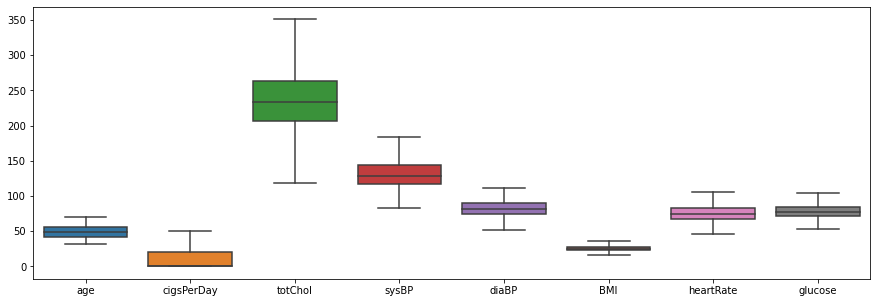

In [144]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,5))
# boxplot of numerical features
sns.boxplot(data=risk_df[numeric_features])
plt.show() 

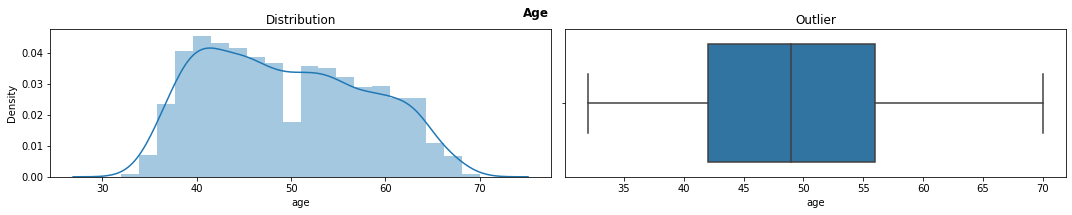

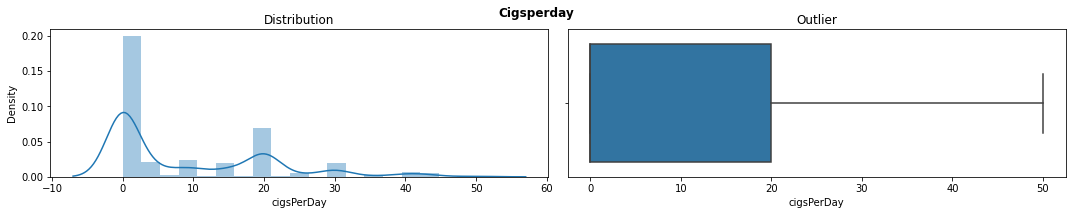

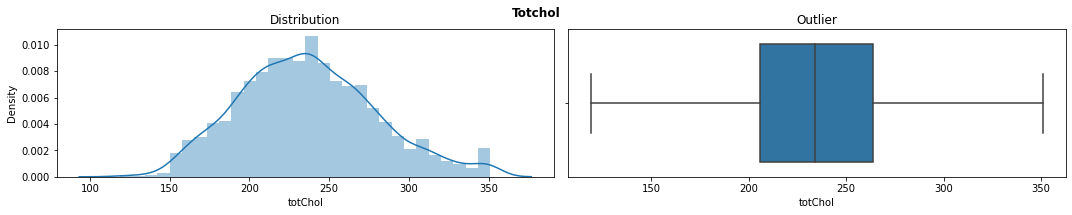

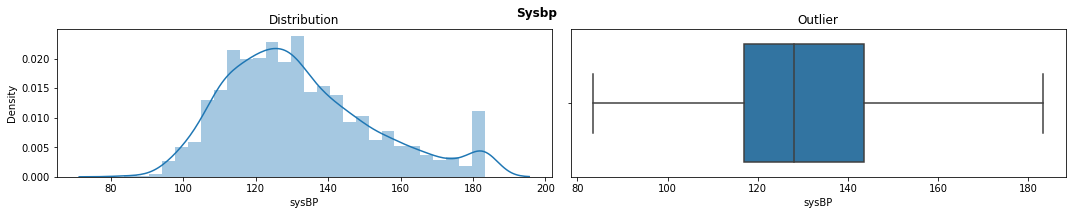

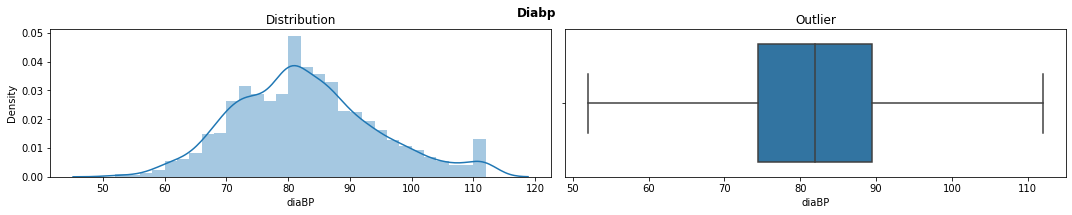

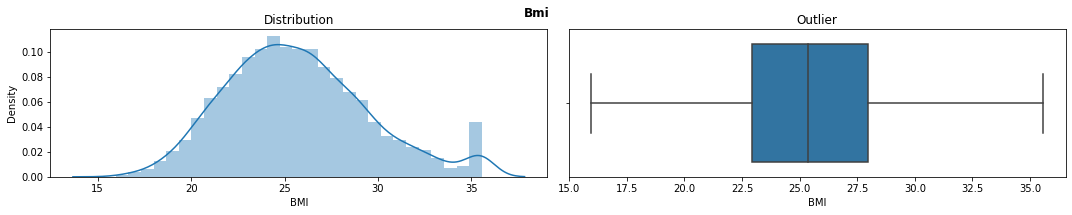

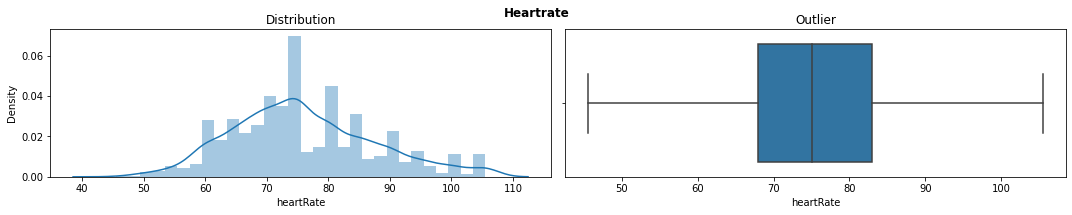

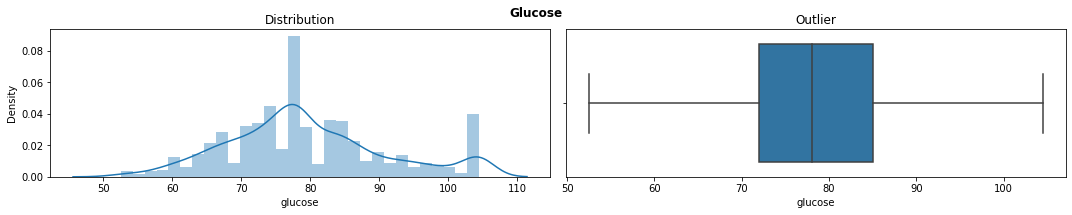

In [143]:
# checking for distribution after treating outliers.
for col in numeric_features:
  fig, ax =plt.subplots(1,2, figsize=(15,3)) 
  sns.distplot(risk_df[col], ax=ax[0]).set(title="Distribution")
  sns.boxplot(risk_df[col], ax=ax[1]).set(title="Outlier")
  plt.suptitle(f'{col.title()}',weight='bold')
  plt.tight_layout()

* **We can also observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution. Therefore, we are not utilizing the numerical feature transformation technique.**

## **6. Feature Engineering**